# Ted Talks


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx


from ast import literal_eval

# Uncomment this if you want to see all rows and columns when displaying a pandas object
# pd.set_option("display.max_rows", None, "display.max_columns", None)

## Part A. Data loading and preprocessing

In [2]:
df = pd.read_csv('data/ted_main.csv')
df.info()
print('We have ' + str(df.shape[0]) + ' data points')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB
We have 2550 data points


The dataset contains 17 columns. According to the Kaggle website these are:
<ol>
    <li> <b>name</b>: The official name of the TED Talk. Includes the title and the speaker. *Use this as the unique id in our dataframe </li>
    <li> <b>title</b>: The title of the talk </li>
    <li> <b>main_speaker</b>: The first named speaker of the talk </li>    
    <li> <b>speaker_occupation</b>: The occupation of the main speaker </li>
    <li> <b>num_speaker</b>: The number of speakers in the talk </li>
    <li> <b>description</b>: A blurb of what the talk is about </li>
    <li> <b>duration</b>: The duration of the talk in seconds </li>
    <li> <b>event</b>: The TED/TEDx event where the talk took place </li>
    <li> <b>languages</b>: The number of languages in which the talk is available </li>
    <li> <b>film_date</b>: The Unix timestamp of the filming </li>
    <li> <b>published_date</b>: The Unix timestamp for the publication of the talk on TED.com </li>
    <li> <b>tags</b>: The themes associated with the talk </li>
    <li> <b>views</b>: The number of views on the talk </li>
    <li> <b>url</b>: The URL of the talk </li>
    <li> <b>ratings</b>: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.) </li>
    <li> <b>comments</b> The number of first level comments made on the talk </li>
    <li> <b>related_talks</b> A list of dictionaries of recommended talks to watch next </li>
</ol>


In [3]:
display(df.head(5))

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Missing data? Not much :D

In [4]:
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


In [6]:
# Transform the film_date and publish_date to datetime objects
# Keep only the day month and year
df['film_date'] = pd.to_datetime(df['film_date'], unit='s').dt.strftime('%d/%m/%Y')
df['published_date'] = pd.to_datetime(df['published_date'], unit='s').dt.strftime('%d/%m/%Y')
df['film_date'] = pd.to_datetime(df['film_date'])
df['published_date'] = pd.to_datetime(df['published_date'])

# Tranfrom stringified dictionary to actual dictionary and stringified list to actual list
df['tags'] = df['tags'].apply(lambda x: literal_eval(x))
df['ratings'] = df['ratings'].apply(lambda x: literal_eval(x))
df['related_talks'] = df['related_talks'].apply(lambda x: literal_eval(x))

In [7]:
# Reorder columns
df = df[['name', 'title', 'main_speaker', 'speaker_occupation', 'num_speaker', 'description', \
         'duration', 'event', 'languages', 'film_date', 'published_date', 'tags', 'views', \
         'url', 'ratings', 'comments', 'related_talks']]
display(df.head(5))

,name,title,main_speaker,speaker_occupation,num_speaker,description,duration,event,languages,film_date,published_date,tags,views,url,ratings,comments,related_talks
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson,Author/educator,1,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,2006-02-25,2006-06-27,"[children, creativity, culture, dance, educati...",47227110,https://www.ted.com/talks/ken_robinson_says_sc...,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",4553,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im..."
1,Al Gore: Averting the climate crisis,Averting the climate crisis,Al Gore,Climate advocate,1,With the same humor and humanity he exuded in ...,977,TED2006,43,2006-02-25,2006-06-27,"[alternative energy, cars, climate change, cul...",3200520,https://www.ted.com/talks/al_gore_on_averting_...,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",265,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im..."
2,David Pogue: Simplicity sells,Simplicity sells,David Pogue,Technology columnist,1,New York Times columnist David Pogue takes aim...,1286,TED2006,26,2006-02-24,2006-06-27,"[computers, entertainment, interface design, m...",1636292,https://www.ted.com/talks/david_pogue_says_sim...,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",124,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i..."
3,Majora Carter: Greening the ghetto,Greening the ghetto,Majora Carter,Activist for environmental justice,1,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,35,2006-02-26,2006-06-27,"[MacArthur grant, activism, business, cities, ...",1697550,https://www.ted.com/talks/majora_carter_s_tale...,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",200,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i..."
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,Hans Rosling,Global health expert; data visionary,1,You've never seen data presented like this. Wi...,1190,TED2006,48,2006-02-22,2006-06-27,"[Africa, Asia, Google, demo, economics, global...",12005869,https://www.ted.com/talks/hans_rosling_shows_t...,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",593,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i..."


### Analyzing complex features

speaker_occupation, ratings and related_talks

In [8]:
# speaker_occupation
print('We have ' + str(df['speaker_occupation'].nunique()) + ' different occupations')
df['speaker_occupation'].value_counts()

We have 1458 different occupations


Writer                        45
Artist                        34
Designer                      34
Journalist                    33
Entrepreneur                  31
                              ..
Global leader                  1
Pricing consultant             1
Poet and language advocate     1
Spider silk scientist          1
Corrections pioneer            1
Name: speaker_occupation, Length: 1458, dtype: int64

In [9]:
# ratings

def extract_ratings_name(x):
    rating_names = []
    for rating in x:
        rating_names.append(str(rating['name']))
    rating_names.sort()
    return rating_names

all_ratings = extract_ratings_name(df.iloc[0][['ratings']][0])
print('For eatings we have ' + str(len(all_ratings)) + ' categories: ' + str(all_ratings))
print('One rating has the following attributes: ' + str(df.iloc[0][['ratings']][0][0]))

For eatings we have 14 categories: ['Beautiful', 'Confusing', 'Courageous', 'Fascinating', 'Funny', 'Informative', 'Ingenious', 'Inspiring', 'Jaw-dropping', 'Longwinded', 'OK', 'Obnoxious', 'Persuasive', 'Unconvincing']
One rating has the following attributes: {'id': 7, 'name': 'Funny', 'count': 19645}


For <b>ratings</b> we have 14 categories: 

In [10]:
# related_talks
df.iloc[0][['related_talks']][0][0]

{'id': 865,
 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg',
 'speaker': 'Ken Robinson',
 'title': 'Bring on the learning revolution!',
 'duration': 1008,
 'slug': 'sir_ken_robinson_bring_on_the_revolution',
 'viewed_count': 7266103}

## Summary of data preprocessing

<ol>
    <li>Expand the <b>speaker_occupation</b> column and make it a list of occupations for each speaker. Use this list to fill in missing values. </li>
    <li>Expand the <b>ratings</b> column in different columns </li>
    <li>Build a network with <b>related_talks</b></li>
</ol>

## Part B. Exploratory data analysis

## main_speaker
Questions:
<ol>
    <li>How many talks does each speaker do?</li>
    <li>Which speakers do the most talks? (first 10)</li>
</ol>

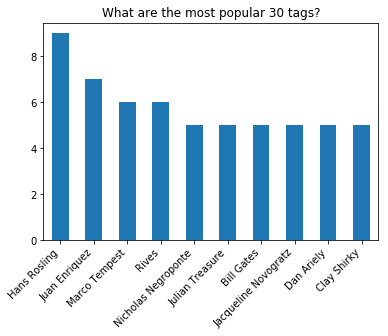

In [82]:
df['main_speaker'].value_counts().sort_values(ascending=False)[:10].plot.bar()
plt.title('What are the most popular 30 tags?')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## num_speaker
Questions:
<ol>
    <li>What's the distribution of number of speakers?</li>
</ol>

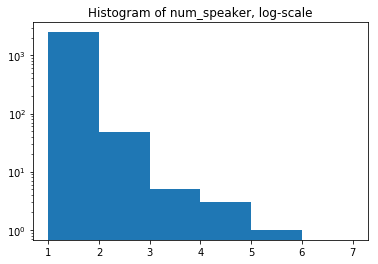

In [38]:
df['num_speaker'].hist(grid=False, bins=range(1, 8))
plt.yscale('log')
plt.title('Histogram of num_speaker, log-scale')
plt.show()

## duration
Questions:
<ol>
    <li>What's the distribution of number of speakers?</li>
    <li>Which are the 10 longest talks?</li>
    <li>Which are the 10 shortest talks?</li>
</ol>

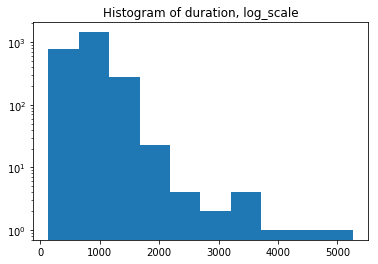

In [79]:
fig, ax = plt.subplots(1, 1)

ax.hist(df['duration'])
ax.set_yscale('log')
ax.set_title('Histogram of duration, log_scale')
plt.show()

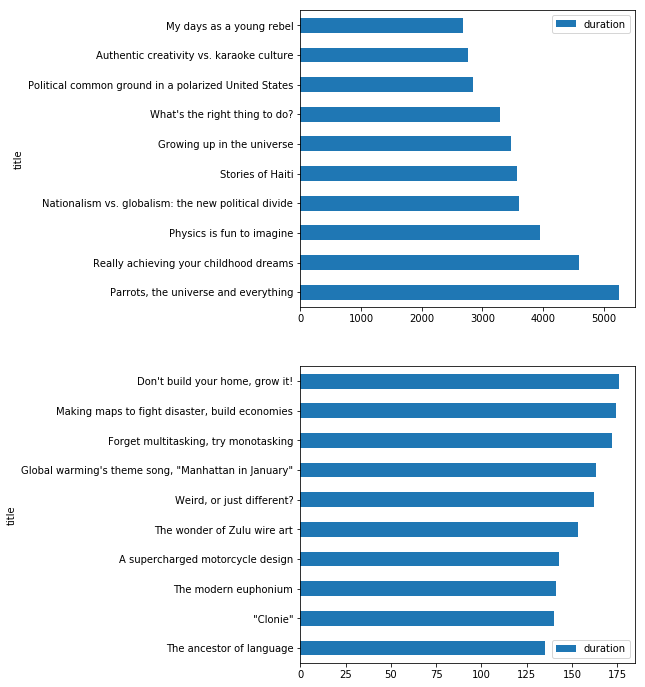

In [76]:
fig, ax = plt.subplots(2, 1, figsize=(6, 12))

bar_plot0 = df[['title', 'duration']].sort_values(by='duration', ascending=False)[:10]
bar_plot0.plot.barh(x='title', y='duration', ax=ax[0])

bar_plot1 = df[['title', 'duration']].sort_values(by='duration')[:10]
bar_plot1.plot.barh(x='title', y='duration', ax=ax[1])
plt.show()

## event
Questions:
<ol>
    <li>How many talks are in each event?</li>
    <li>Which are the first 10 events based on number of talks?</li>
</ol>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

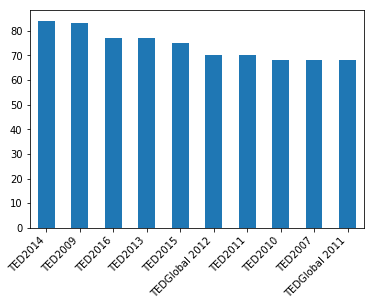

In [85]:
event_bar_plot = df['event'].value_counts().sort_values(ascending=False)[:10]
event_bar_plot.plot.bar(x = 'event', y = 'count')
plt.xticks(rotation=45, horizontalalignment='right')

## languages
Sadly, this just tells us the number of languages the talk is available in, and not a list of languages.</br>
Questions:
<ol>
    <li>What's the distribution of languages?</li>
</ol>

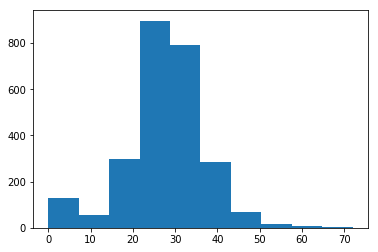

In [88]:
df['languages'].hist(grid=False)

## film_date and published_date
Will analyze the years of the film and published dates.</br>
Questions:
<ol>
    <li>How many ted talks are each year?</li>
    <li>Show the growth over the year</li>
</ol>

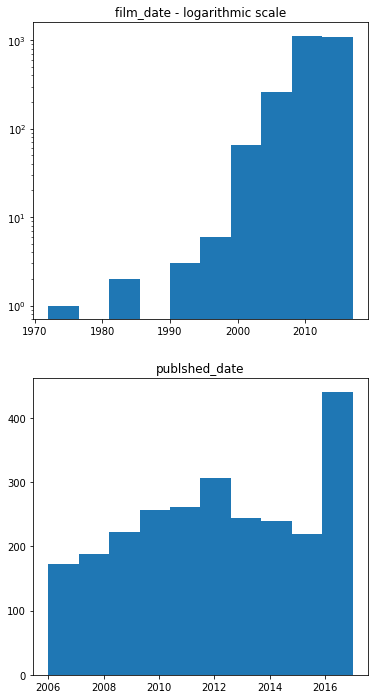

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(6,12))
ax[0].hist(df['film_date'].dt.year)
ax[0].set_yscale('log')
ax[0].set_title('film_date - logarithmic scale')
ax[1].hist(df['published_date'].dt.year)
ax[1].set_title('publshed_date')
plt.show()

## tags
Questions:
<ol>
    <li>How many talks belong to each tag?</li>
    <li>Most popular 30 tags</li>
</ol>

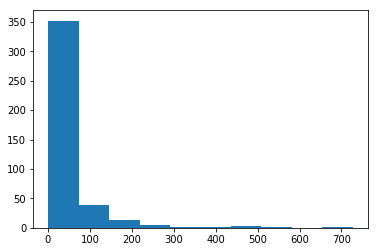

In [91]:
tags_count = pd.Series([y for x in df['tags'] for y in x]).value_counts()
tags_count.hist(grid=False)
plt.show()

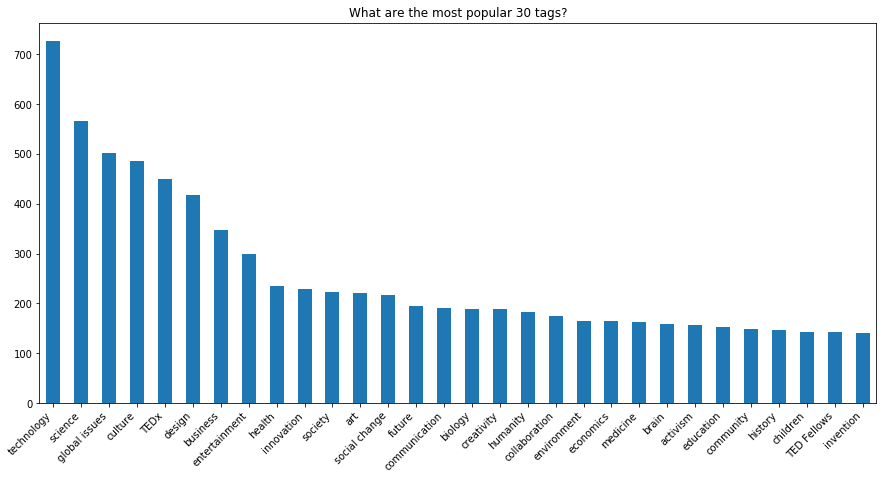

In [92]:
tags_count.sort_values(ascending=False)[:30].plot.bar(figsize=(15,7))
plt.title('What are the most popular 30 tags?')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## views
Questions:
<ol>
    <li>What is the distribution of views?</li>
    <li>First 10 talks in terms of number of views</li>
</ol>

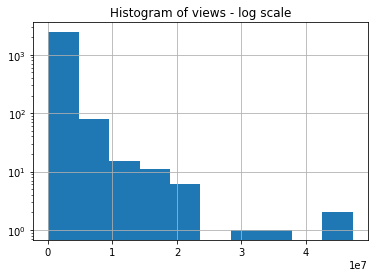

In [98]:
df['views'].hist()
plt.yscale('log')
plt.title('Histogram of views - log scale')
plt.show()

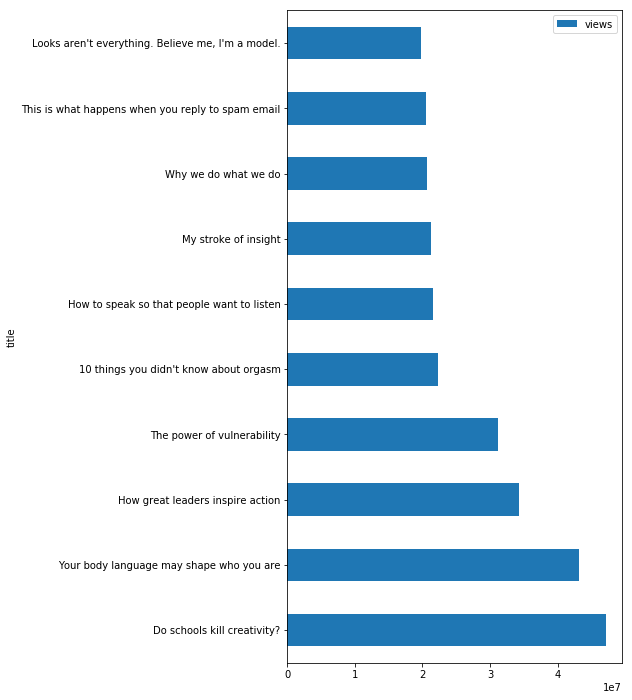

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(6, 12))

bar_plot0 = df[['title', 'views']].sort_values(by='views', ascending=False)[:10]
bar_plot0.plot.barh(x='title', y='views', ax=ax)

plt.show()

## comments
Questions:
<ol>
    <li>What is the distribution of comments?</li>
    <li>Which talks have the most comments? First 10</li>
</ol>

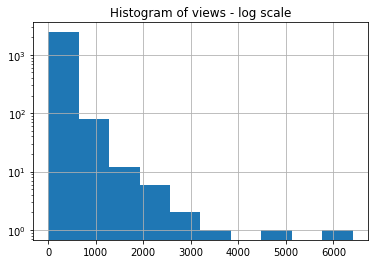

In [101]:
df['comments'].hist()
plt.yscale('log')
plt.title('Histogram of views - log scale')
plt.show()

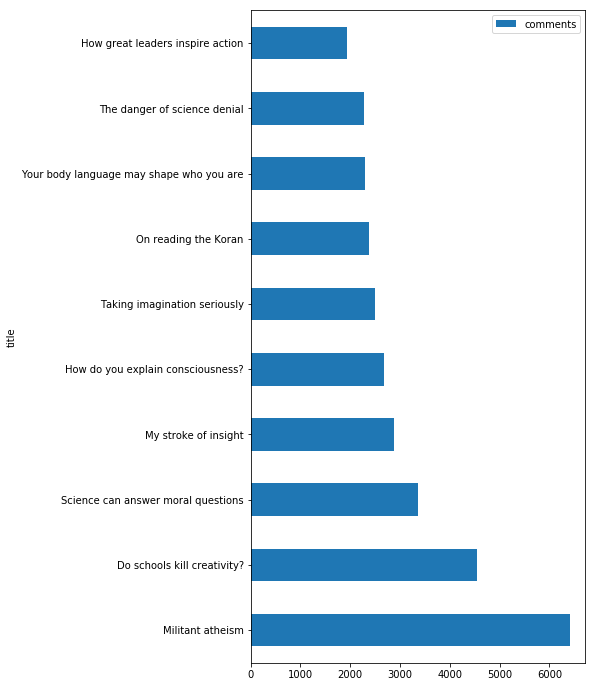

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(6, 12))

bar_plot0 = df[['title', 'comments']].sort_values(by='comments', ascending=False)[:10]
bar_plot0.plot.barh(x='title', y='comments', ax=ax)

plt.show()